In [5]:
import sys
sys.path.append("..")

from src.eval.Run import Run

In [6]:
RESULTS = [
    "2025-08-06_11-44-21_librispeech-pc-test-clean_tiny",
    # "2025-07-30_18-03-36_librispeech-pc-test-clean_tiny",
    # "2025-07-30_18-04-16_librispeech-pc-test-clean_small",
    # "2025-07-30_18-04-21_librispeech-pc-test-clean_medium",
    # "2025-07-30_18-04-24_librispeech-pc-test-clean_large",
    # "2025-07-30_23-03-57_librispeech-pc-test-clean_large-v3",
    # "2025-05-05_13-29-23_librispeech-pc-test-clean_large-v3-turbo"
]
runs = [Run.from_directory("../out/" + result) for result in RESULTS]

In [7]:
for run in runs:
    run.build_metrics()

Building metrics: 100%|██████████| 5/5 [00:33<00:00,  6.68s/it]


In [8]:
run.wer

11.920816737174066

In [9]:
import pandas as pd
df = pd.DataFrame({
    "model": [result.split("_")[-1] for result in RESULTS]
})

In [10]:
df["wer"] = [run.wer for run in runs]
df["wff_latency"] = [run.wff_latency for run in runs]
df["wfc_latency"] = [run.wfc_latency for run in runs]

In [11]:
df

,model,wer,wff_latency,wfc_latency
0,tiny,11.920817,4.389747,1.15088


In [12]:
from src.eval.utils.draw_alignments import draw

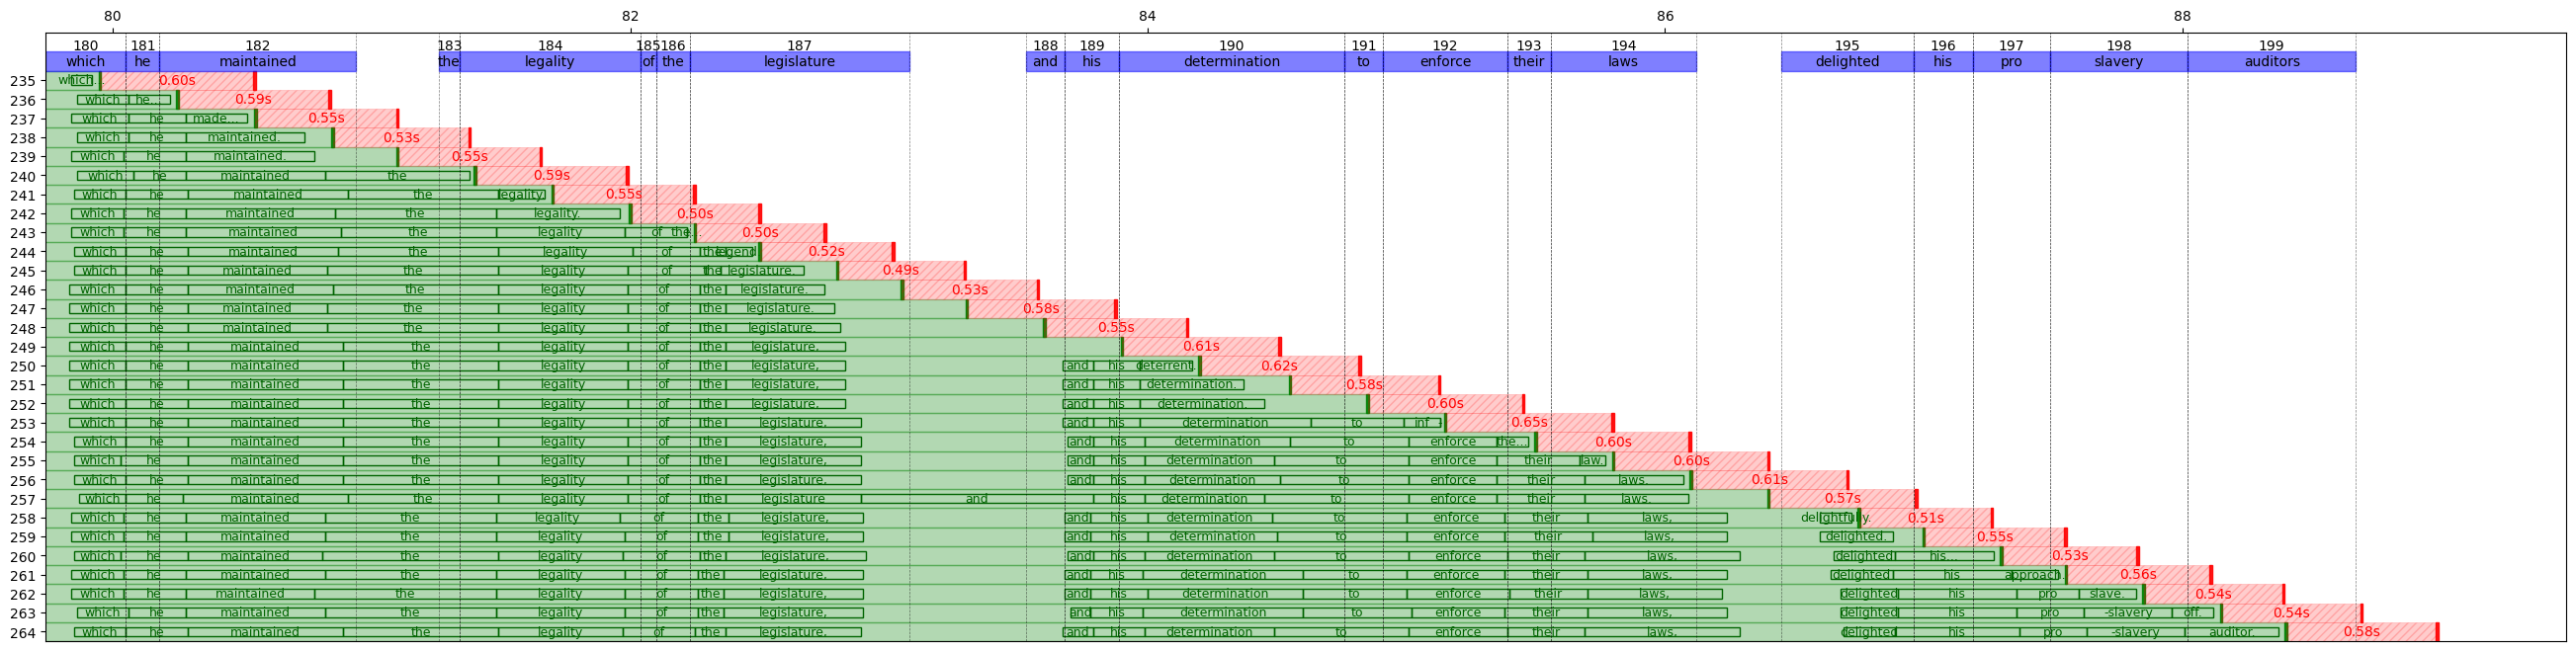

In [14]:
for i in range(len(runs)):
    draw(runs[i].samples[0], 180, 20, alignment=None)

In [15]:
from matplotlib import pyplot as plt

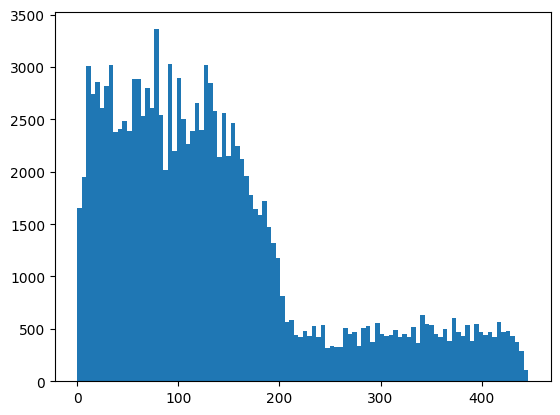

In [16]:
run = runs[0]
word_starts = []
for sample in run.samples:
    for pt in sample.partials:
        for word in pt.result:
            word_starts.append(word.start)

plt.hist(word_starts, bins=100)
plt.show()

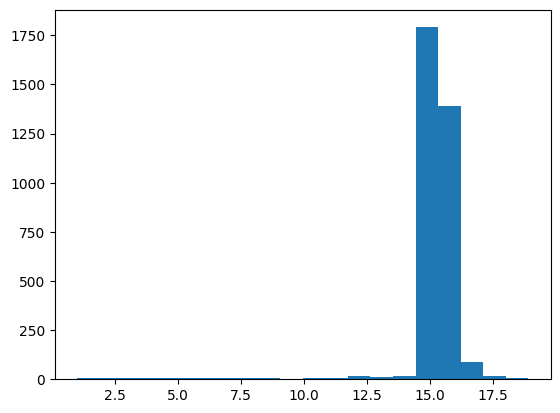

In [17]:
run = runs[0]
window_size = []
for sample in run.samples:
    for pt in sample.partials:
        window_size.append(pt.window[1] - pt.window[0])

plt.hist(window_size, bins=20)
plt.show()

In [21]:
from src.helper.word_sequence import word_sequence_to_string

run = runs[0]
sample = run.samples[0]

y = word_sequence_to_string(sample.baseline)
y_final = word_sequence_to_string(sample.final)

for fm in sample.final_messages:
    print(f"{fm.reason:<20} {word_sequence_to_string(fm.result)}")

sentence end         The bogus legislature numbered 36 members.
threshold reached    The bogus legislature numbered 36 members.
threshold reached    This was at the March election 1855.
threshold reached    The bogus legislature numbered 36 members. This was at the March election 1855.
threshold reached    The bogus legislature numbered 36 members. This was at the March election 1855.
threshold reached    That summer's immigration, however, being mainly from the
threshold reached    The bogus legislature numbered 36 members. This was at the March election 1855. That summer's immigration, however, being mainly from the free states, greatly...
threshold reached    The bogus legislature numbered 36 members. This was at the March election 1855.
threshold reached    That summer's immigration, however, being mainly from the free states, greatly changed the
threshold reached    The bogus legislature numbered 36 members. This was at the March election 1855.
threshold reached    That summer's i